In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv(r"C:\Users\Hp\Downloads\bank-full.csv")

In [3]:
dataset.head(200)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,33,blue-collar,single,secondary,no,307,yes,no,unknown,5,may,309,2,-1,0,unknown,no
196,38,services,married,secondary,no,155,yes,no,unknown,5,may,248,1,-1,0,unknown,no
197,50,technician,divorced,tertiary,no,173,no,yes,unknown,5,may,98,1,-1,0,unknown,no
198,43,management,married,tertiary,no,400,yes,no,unknown,5,may,256,1,-1,0,unknown,no


In [4]:
dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
dataset.shape

(45211, 17)

In [8]:
dataset.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
dataset["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

# Exploratory Analysis

# Missing Values

In [11]:
feature_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()]
for feature in feature_with_nan:
    print(feature,np.round(dataset[feature].isnull().mean(),4, '%missing values'))
else:
    print("no missing values found")

no missing values found


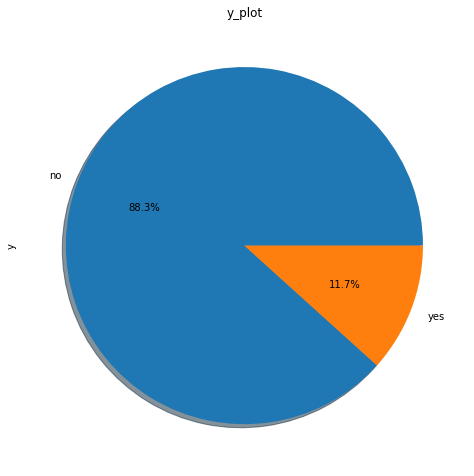

In [12]:
f,ax,=plt.subplots(figsize=(8,10))
ax=dataset['y'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',shadow=True)
ax.set_title('y_plot')
plt.show()

# Explore the categorical features

In [13]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [14]:
for feature in categorical_features:
    print("The feature is {} and the number of categories are {}".format(feature,len(dataset[feature].unique())))

The feature is job and the number of categories are 12
The feature is marital and the number of categories are 3
The feature is education and the number of categories are 4
The feature is default and the number of categories are 2
The feature is housing and the number of categories are 2
The feature is loan and the number of categories are 2
The feature is contact and the number of categories are 3
The feature is month and the number of categories are 12
The feature is poutcome and the number of categories are 4
The feature is y and the number of categories are 2


so as we can see there are 10 categorical feature and ,Job and month has highest categorical feature.

# find categorical feature distribution

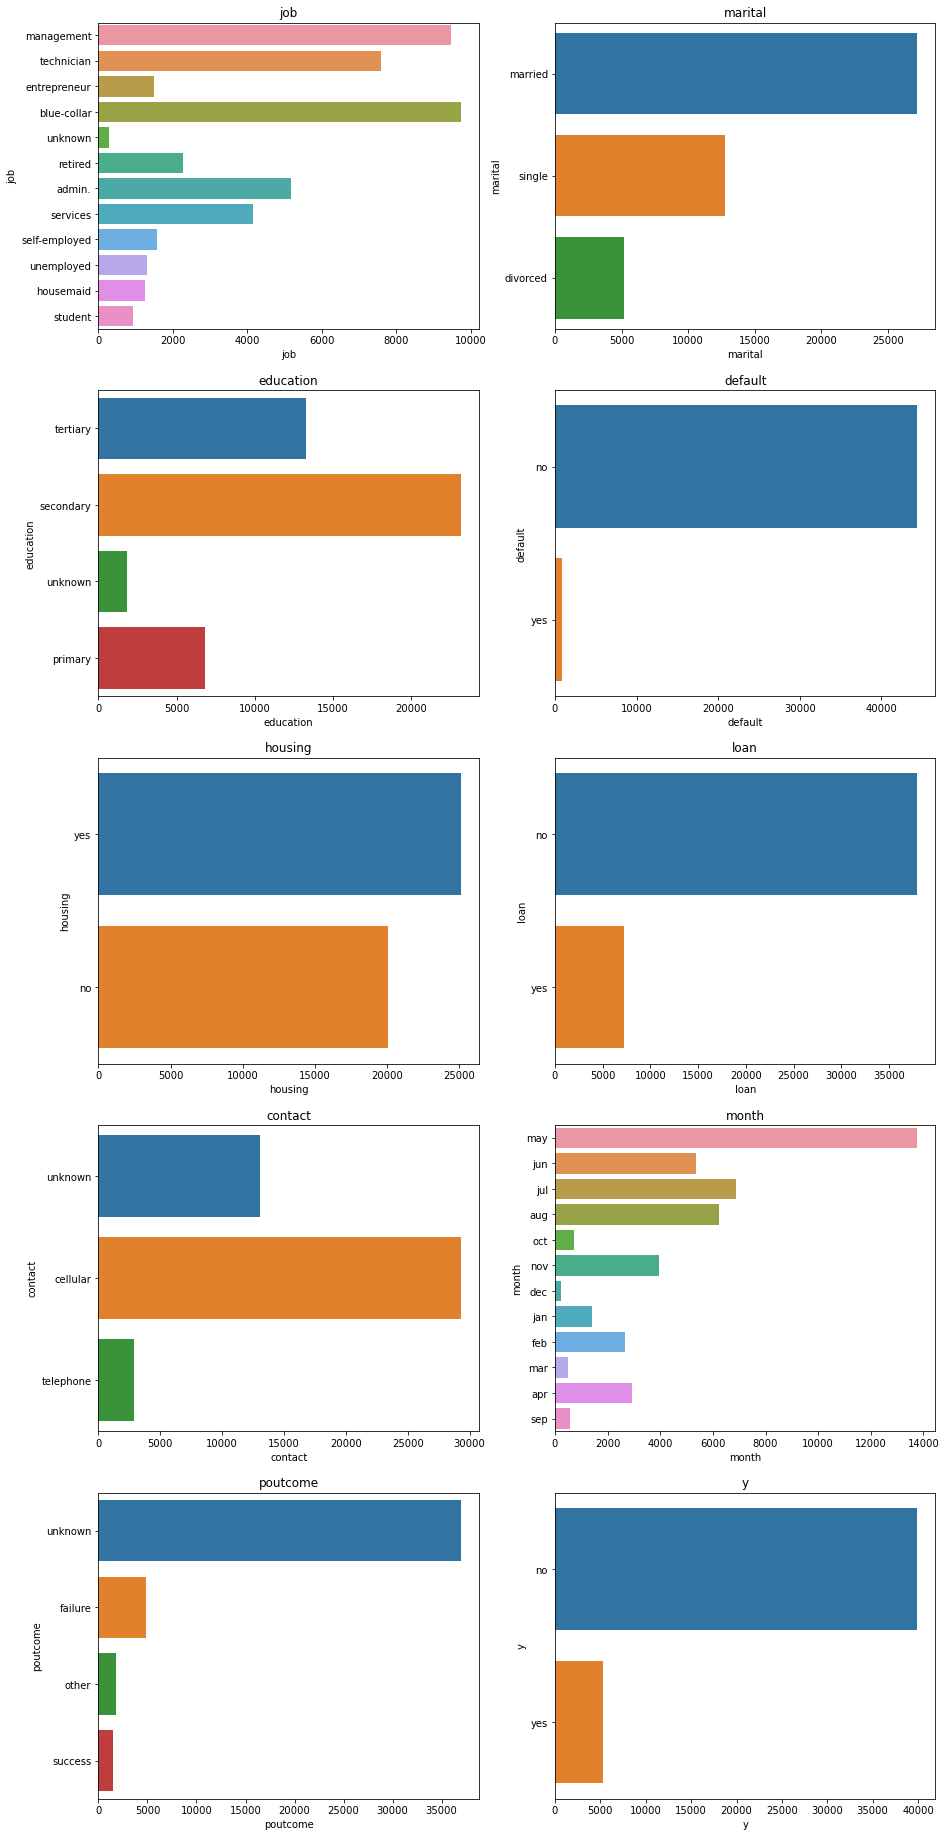

In [15]:
plt.figure(figsize=(15,80),facecolor='white')
plotnumber=1
for categorical_feature in categorical_features:
    ax=plt.subplot(12,2,plotnumber)
    sns.countplot(y=categorical_feature,data=dataset)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

# Relationship between categorical feature and labels

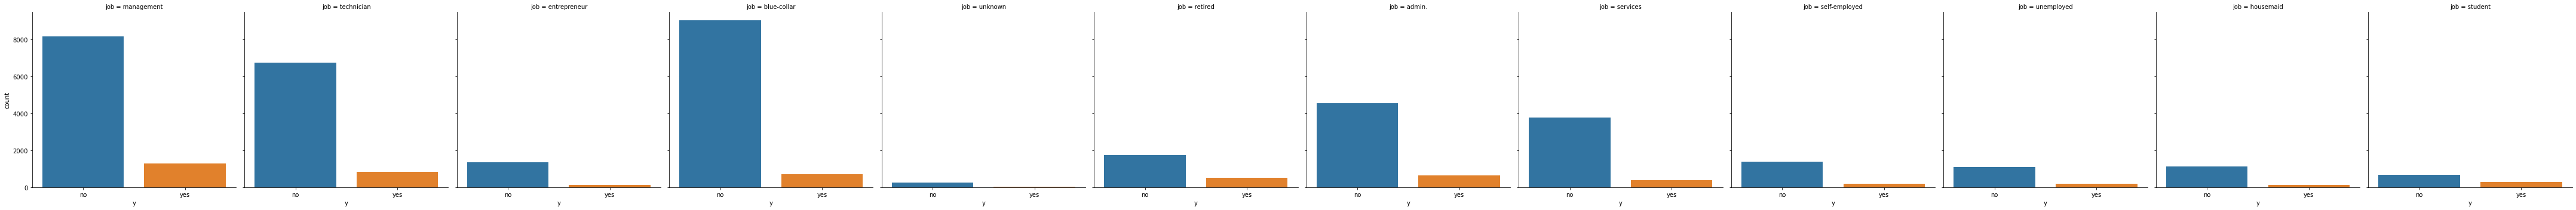

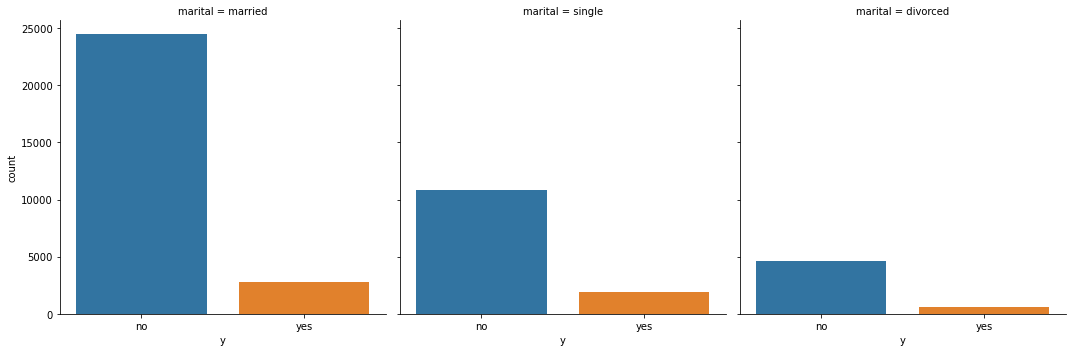

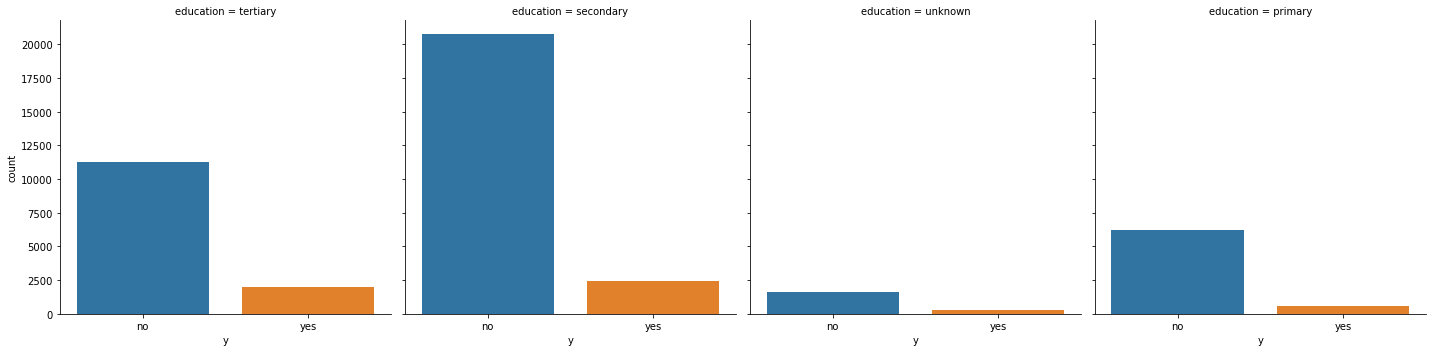

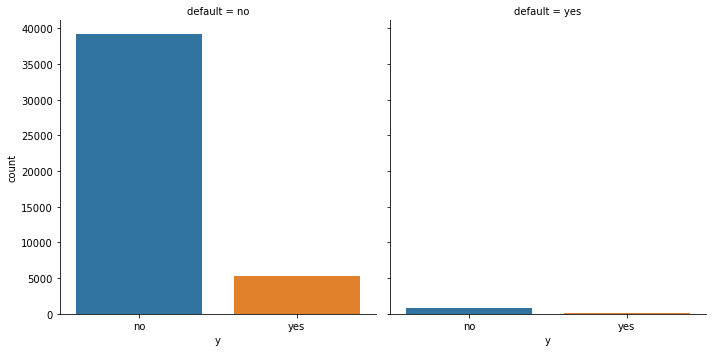

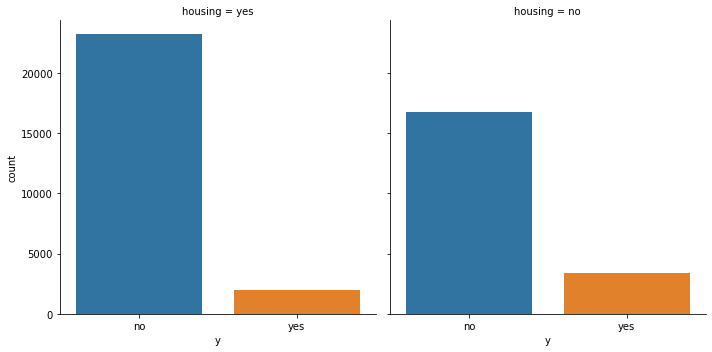

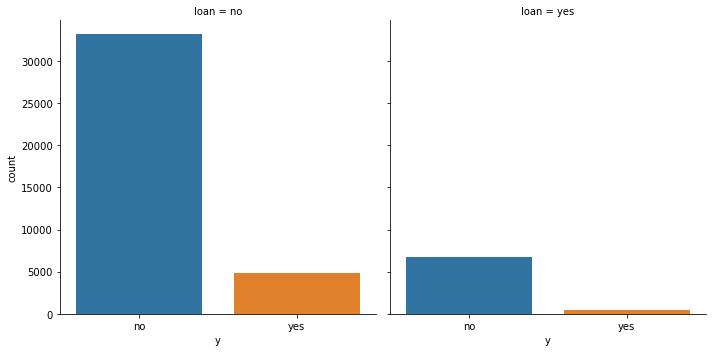

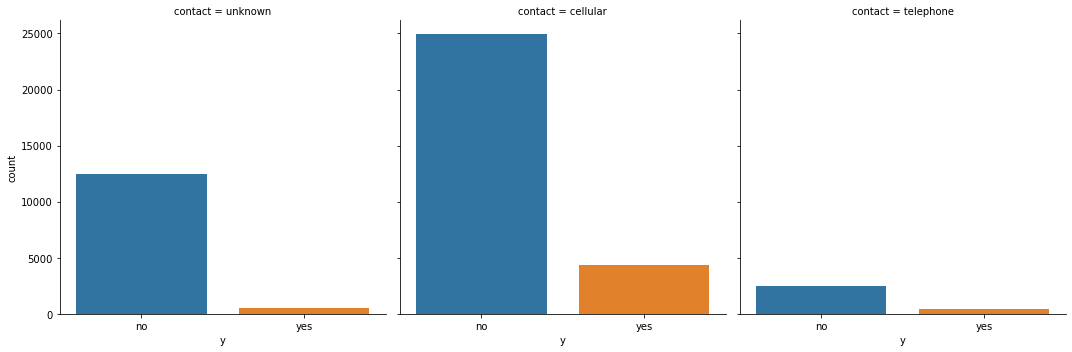

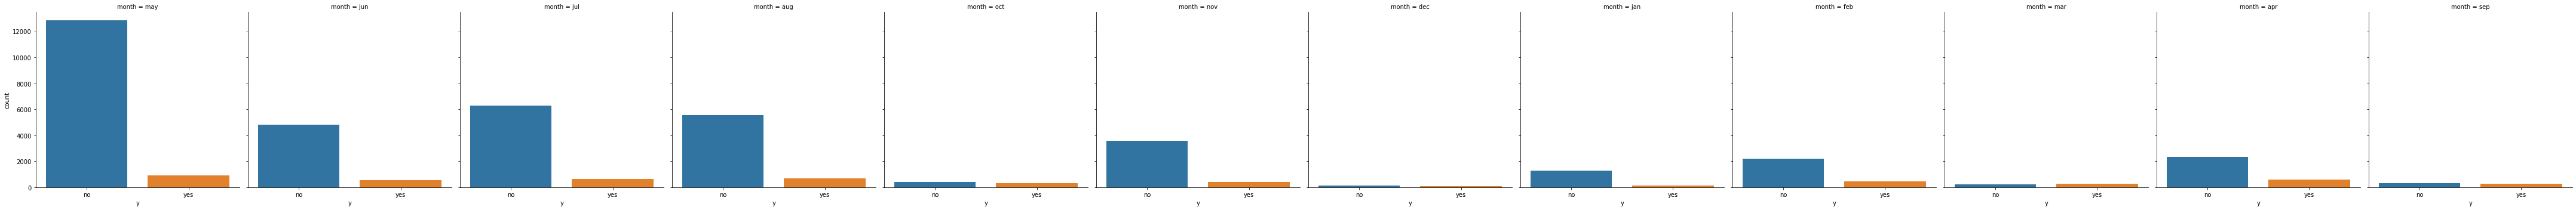

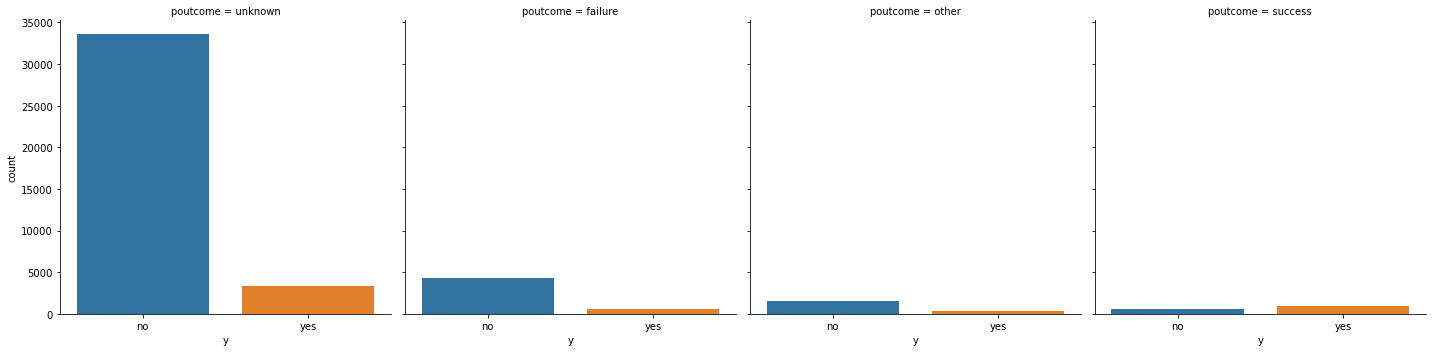

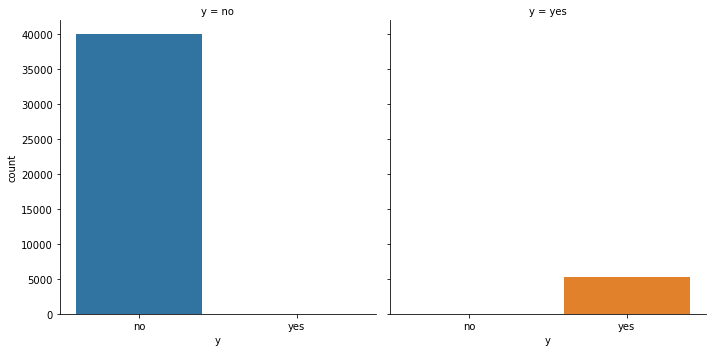

In [16]:
#firstly we have to check that out target label split over categorical features
#find out the realationship between categorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x='y',col=categorical_feature,kind='count',data=dataset)
plt.show()

# Numerical Features

In [17]:
#List of numerical_variables
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes!='O']
print("Number of numerical variable",len(numerical_features))
dataset[numerical_features].head()

Number of numerical variable 7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


# Discrete features

In [18]:
discrete_features=[feature for feature in numerical_features if len(dataset[feature].unique())<25]
print("Discrete variables count():{}".format(len(discrete_features)))

Discrete variables count():0


So, no discrete value is present here

# Continuous features

In [19]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_features+['y']]
print("Continuous feature count {}".format(len(continuous_features)))

Continuous feature count 7


# Distribution of continuous features

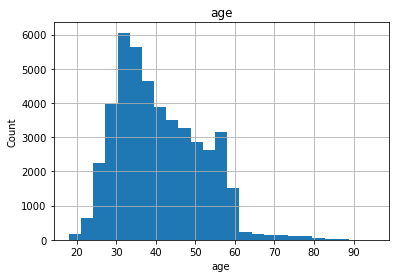

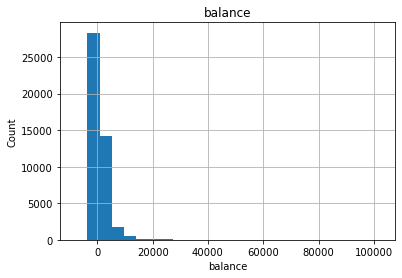

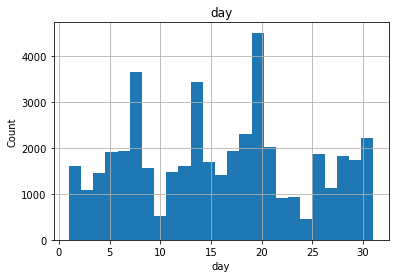

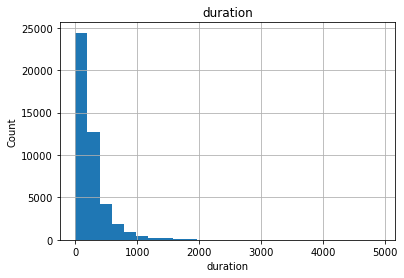

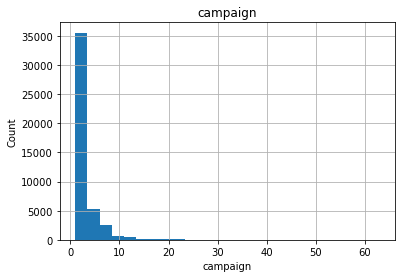

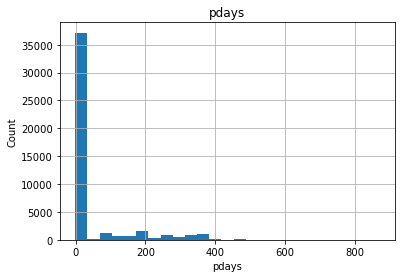

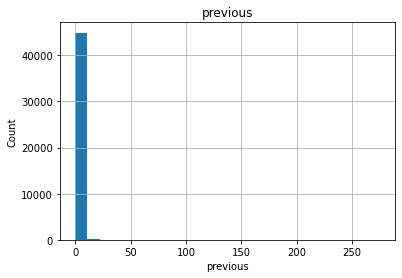

In [20]:
for feature in continuous_features:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

# Relation between continuous feature and labels

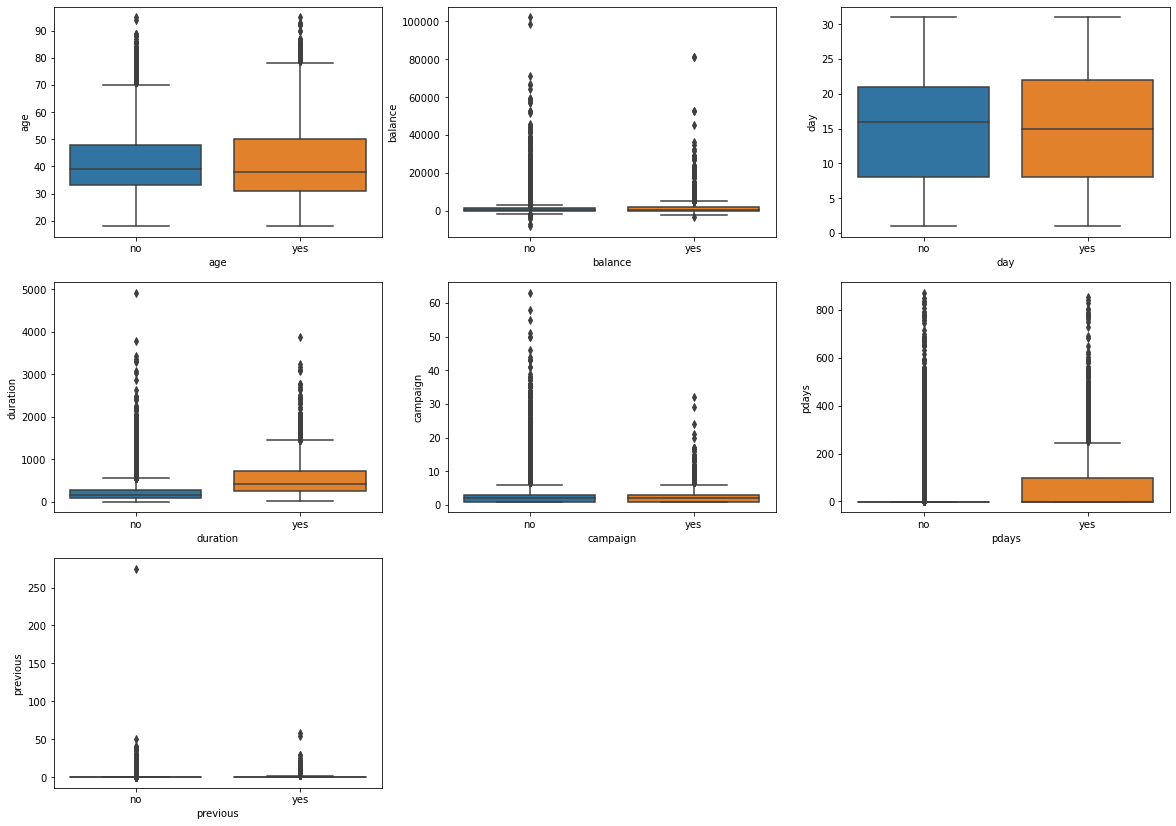

In [21]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for feature in continuous_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(x='y',y=dataset[feature],data=dataset)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

# find Outliers in numerical feature

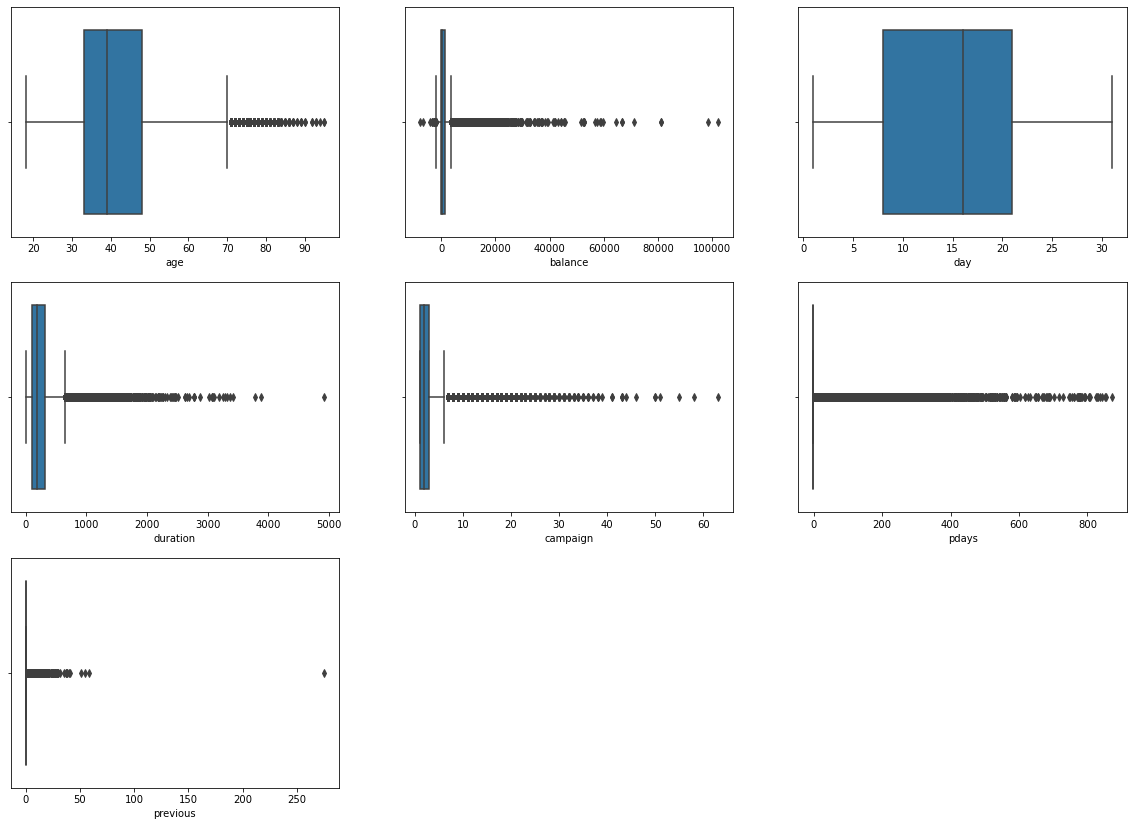

In [22]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for numerical_feature in numerical_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(dataset[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()
    

Age,balance,duration,campaign,,pdays,and previous has some outliers

# Explore the Correlation between these numerical features

<AxesSubplot:>

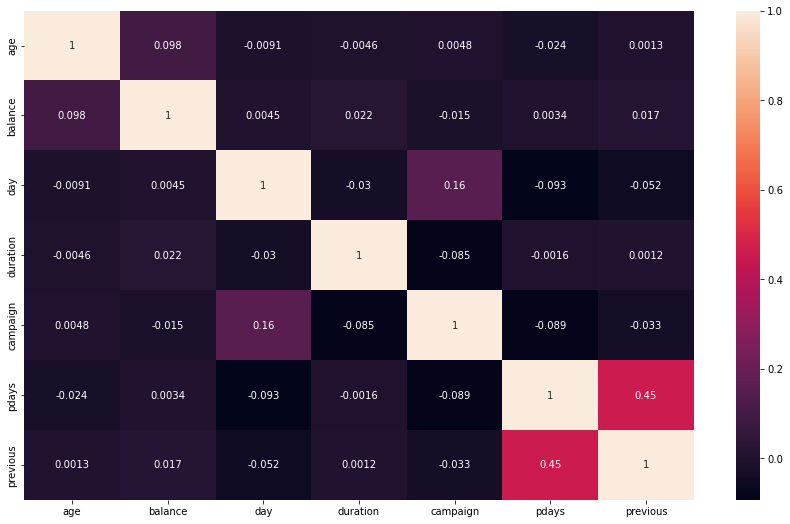

In [23]:
cor_mat=dataset.corr()
fig=plt.figure(figsize=(15,9))
sns.heatmap(cor_mat,annot=True)

In [24]:
dataset['y'].groupby(dataset['y']).count()

y
no     39922
yes     5289
Name: y, dtype: int64

# Feature Engineering

In [25]:
dataset.shape

(45211, 17)

In [26]:
#default feature does not play the important role
dataset.groupby(['y','default']).size()

y    default
no   no         39159
     yes          763
yes  no          5237
     yes           52
dtype: int64

In [27]:
data.drop(['default'],axis=1,inplace=True)

In [28]:
data.groupby(['y','pdays']).size()

y    pdays
no   -1       33570
      1           9
      2          35
      3           1
      4           1
              ...  
yes   804         1
      805         1
      828         1
      842         1
      854         1
Length: 914, dtype: int64

In [29]:
#drop pdays as it has -2 value for around 40%
data.drop(['pdays'],axis=1,inplace=True)

In [30]:
#remove outliers in feature age...
data.groupby('age',sort=True)['age'].count()
#these can be ignored and values lies between 18 to 95.

age
18     12
19     35
20     50
21     79
22    129
     ... 
90      2
92      2
93      2
94      1
95      2
Name: age, Length: 77, dtype: int64

In [31]:
#remove outlier in feature balance
data.groupby(['y','balance'],sort=True)['balance'].count()
#these outlier should not be remove as balance goes high, client show intrest on deposit.
#don't see or remove everytime negative values it may be helpful for us like here balance have negative values are not intrested
#so thats good for our dataset and high values category are intrested.

y    balance
no   -8019      1
     -6847      1
     -4057      1
     -3372      1
     -3313      1
               ..
yes   34646     1
      36252     1
      45248     1
      52587     2
      81204     2
Name: balance, Length: 9258, dtype: int64

In [32]:
#remove outlier in feature duration
data.groupby(['y','duration'],sort=True)['duration'].count()
df=data[data['duration']<5/60]
df.groupby(['y','duration'],sort=True)['duration'].count()
 

y   duration
no  0           3
Name: duration, dtype: int64

In [33]:
data['duration']=data['duration'].apply(lambda n:n/60).round(2)

In [34]:
#remove oytler in feature campaign
data.groupby(['y','campaign'],sort=True)['campaign'].count()


y    campaign
no   1           14983
     2           11104
     3            4903
     4            3205
     5            1625
                 ...  
yes  20              1
     21              1
     24              1
     29              1
     32              1
Name: campaign, Length: 70, dtype: int64

In [35]:
df=data[data['campaign']<33]

In [36]:
df.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           14983
     2           11104
     3            4903
     4            3205
     5            1625
     6            1199
     7             688
     8             508
     9             306
     10            252
     11            185
     12            151
     13            127
     14             89
     15             80
     16             77
     17             63
     18             51
     19             44
     20             42
     21             34
     22             23
     23             22
     24             19
     25             22
     26             13
     27             10
     28             16
     29             15
     30              8
     31             12
     32              8
yes  1            2561
     2            1401
     3             618
     4             317
     5             139
     6              92
     7              47
     8              32
     9              21
     10             14
     11             

In [37]:
df1=df[df['previous']<31]

# Scale Numeric data

In [38]:
from sklearn.preprocessing import StandardScaler

#Copying original dataframe
data=dataset.copy()

scaler=StandardScaler()
num_cols=['age','balance','day','campaign','pdays','previous']
data[num_cols]=scaler.fit_transform(data[num_cols])
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.606965,management,married,tertiary,no,0.256419,yes,no,unknown,-1.298476,may,261,-0.569351,-0.411453,-0.25194,unknown,no
1,0.288529,technician,single,secondary,no,-0.437895,yes,no,unknown,-1.298476,may,151,-0.569351,-0.411453,-0.25194,unknown,no
2,-0.747384,entrepreneur,married,secondary,no,-0.446762,yes,yes,unknown,-1.298476,may,76,-0.569351,-0.411453,-0.25194,unknown,no
3,0.571051,blue-collar,married,unknown,no,0.047205,yes,no,unknown,-1.298476,may,92,-0.569351,-0.411453,-0.25194,unknown,no
4,-0.747384,unknown,single,unknown,no,-0.447091,no,no,unknown,-1.298476,may,198,-0.569351,-0.411453,-0.25194,unknown,no


# Encode Categorical Value

In [39]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False)
cat_cols=['job','marital','education','default','housing','loan','contact','month','poutcome']

#Encode Categorical Data
data=dataset.copy()
df_encoded=pd.DataFrame(encoder.fit_transform(data[cat_cols]))
df_encoded.columns=encoder.get_feature_names(cat_cols)

#Replace Categorical Data with encoded data
data=data.drop(cat_cols, axis=1)
data=pd.concat([df_encoded,data],axis=1)

#Encode target value
data['y']=data['y'].apply(lambda x: 1 if x=='yes' else 0)

print('Shape of the dataframe:',data.shape)
data.head()

Shape of the dataframe: (45211, 52)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous,y
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,58,2143,5,261,1,-1,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,44,29,5,151,1,-1,0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,33,2,5,76,1,-1,0,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,47,1506,5,92,1,-1,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,33,1,5,198,1,-1,0,0


# Split Dataset into train and test

In [40]:
X=data.drop(['y'],axis=1)
y=data['y']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=True,test_size=0.2,random_state=1)

In [41]:
print(X_train.shape,X_test.shape)

(36168, 51) (9043, 51)


In [42]:
len(X_train)

36168

In [43]:
len(X_test)

9043

# Model_Selection

In [44]:
cols=X_train.columns
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train=pd.DataFrame(X_train,columns=[cols])
X_test=pd.DataFrame(X_test,columns=[cols])

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,random_state=0)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
print("Random forest model score:",np.abs(score)*100)

Random forest model score: 90.82162999004754


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7993
           1       0.66      0.43      0.52      1050

    accuracy                           0.91      9043
   macro avg       0.80      0.70      0.73      9043
weighted avg       0.90      0.91      0.90      9043



<AxesSubplot:>

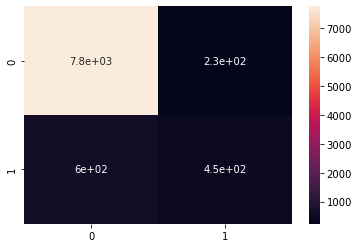

In [48]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(data=cm,annot=True)